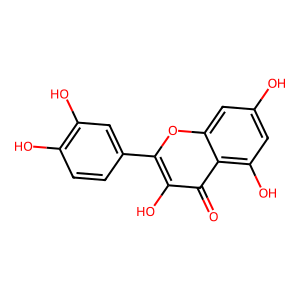

In [1]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG

smiles = 'C1=CC(=C(C=C1C2=C(C(=O)C3=C(C=C(C=C3O2)O)O)O)O)O' 
m = Chem.MolFromSmiles(smiles)

def moltosvg(mol, molSize = (300,300), kekulize = True):
    mc = Chem.Mol(mol.ToBinary())
    if kekulize:
        try:
            Chem.Kekulize(mc)
        except:
            mc = Chem.Mol(mol.ToBinary())
    if not mc.GetNumConformers():
        rdDepictor.Compute2DCoords(mc)
    drawer = rdMolDraw2D.MolDraw2DSVG(molSize[0],molSize[1])
    drawer.DrawMolecule(mc)
    drawer.FinishDrawing()
    svg = drawer.GetDrawingText()
    return svg.replace('svg:','')

SVG(moltosvg(m))

In [2]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

def show(smi, style='stick'):
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    mblock = Chem.MolToMolBlock(mol)

    view = py3Dmol.view(width=200, height=200)
    view.addModel(mblock, 'mol')
    view.setStyle({style:{}})
    view.zoomTo()
    view.show()
    
# example
show(smiles)  # or 'P'

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [3]:
from rdkit import Chem
from rdkit.Chem import AllChem
import py3Dmol

def getMolBlock(smi):
    mol = Chem.MolFromSmiles(smi)
    mol = Chem.AddHs(mol)
    AllChem.EmbedMolecule(mol)
    AllChem.MMFFOptimizeMolecule(mol, maxIters=200)
    mblock = Chem.MolToMolBlock(mol)

    return mblock

In [4]:
mol = getMolBlock(smiles)
print(mol)
print(type(mol))


     RDKit          3D

 32 34  0  0  0  0  0  0  0  0999 V2000
    2.5668    0.1454   -1.5866 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.9316    0.4484   -1.5434 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.5553    0.6405   -0.3144 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.8223    0.5337    0.8663 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.4608    0.2302    0.8257 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8167    0.0236   -0.4058 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.3675   -0.2716   -0.4345 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.1709   -1.2558   -1.1782 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6353   -1.4679   -1.1170 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.1659   -2.3579   -1.7781 O   0  0  0  0  0  0  0  0  0  0  0  0
   -2.4115   -0.5843   -0.2457 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8000   -0.7031   -0.1256 C   0  0  0  0  0  0  0  0  0  0  0  0
   -4.5065    0.1546    0.7143 C   0  0  0  0  0  0  0  0  0  0  0  0
   -3.8127    1.1272    1

In [5]:
import torch
import molgrid
from openbabel import pybel as pybel

In [6]:
sdf = pybel.readstring('sdf',mol)

In [7]:
c = molgrid.CoordinateSet(sdf)

In [8]:
print(c)

In [9]:
gmaker = molgrid.GridMaker()
dims = gmaker.grid_dimensions(molgrid.defaultGninaLigandTyper.num_types())
gridtensor = torch.zeros(dims,dtype=torch.float32)

In [10]:
gmaker.forward(c.center(),c,gridtensor)

In [11]:
print(gridtensor.shape)

torch.Size([14, 48, 48, 48])


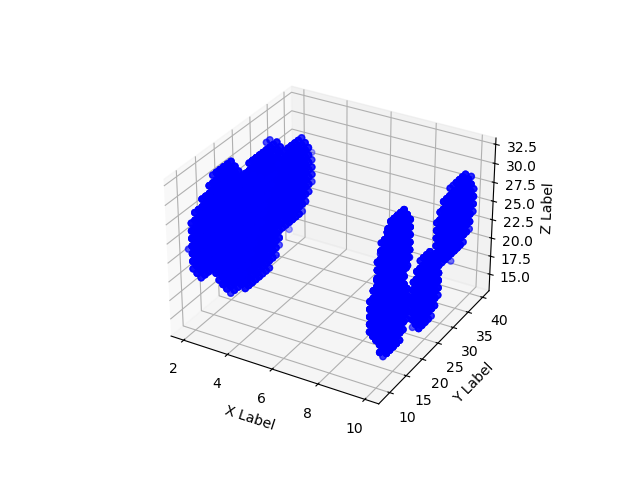

In [13]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
%matplotlib widget
# Create a sample 4D tensor
tensor = gridtensor

# Get the non-zero indices
non_zero_indices = torch.nonzero(tensor)

# Extract the coordinates
x, y, z, _ = non_zero_indices.t().numpy()

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, c='b', marker='o')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.show()
